In [1]:
#Se importa el almacenamiento Google Drive, ésto puede ser visible desde el menú de la izquierda
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
#Librerias
import os
import random
from skimage.io import imread
import cv2
from keras.preprocessing import image
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import pandas as pd

import keras
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

%matplotlib inline

In [3]:
#Carga de imagenes PREDICCION
imgT_path='/content/drive/MyDrive/Trabajos/Trabajo 3/Prediccion/Glasses'
x_test=[]
y_test=[]
#Imagenes con gafas
for img in sorted(os.listdir(imgT_path)):
    Face=cv2.imread(imgT_path+'/'+img,-1)
    Face = image.img_to_array(Face)
    x_test.append(cv2.cvtColor(cv2.resize(Face, (171,213), interpolation = cv2.INTER_AREA), cv2.COLOR_RGB2GRAY).astype('float32'))
    y_test.append(1)
    #x_trn_glass.append(cv2.cvtColor(cv2.resize(Face, (60,64), interpolation = cv2.INTER_AREA), cv2.COLOR_RGB2GRAY))
    #x_trn_glass.append(cv2.cvtColor(cv2.resize(Face, (30,32), interpolation = cv2.INTER_AREA), cv2.COLOR_RGB2GRAY))
sunG=len(y_test)
print('Cantidad de imagenes con gafas: ',len(y_test))

#Imagenes sin gafas
imgT_path='/content/drive/MyDrive/Trabajos/Trabajo 3/Prediccion/NoGlasses'
for img in sorted(os.listdir(imgT_path)):
    Face=cv2.imread(imgT_path+'/'+img,-1)
    Face = image.img_to_array(Face)
    x_test.append(cv2.cvtColor(cv2.resize(Face, (171,213), interpolation = cv2.INTER_AREA), cv2.COLOR_RGB2GRAY).astype('float32'))
    y_test.append(0)

x_test=np.array(x_test)
print('Cantidad de imagenes sin gafas',len(y_test)-sunG)

Cantidad de imagenes con gafas:  289
Cantidad de imagenes sin gafas 206


In [4]:
#Carga del modelo entrenado
new_model = keras.models.load_model('/content/drive/MyDrive/Trabajos/Trabajo 3/Código/modelo.h5')

Real :- Glasses


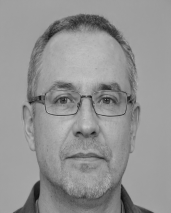

Predicted :-  Glasses


In [5]:
#Prediccion de una sola imagen
y_predicted=new_model.predict(x_test[0:1])

output={0:'No Glasses',1:'Glasses'}
print("Real :-",output[y_test[0]])
cv2_imshow(x_test[0])
print("Predicted :- ",output[np.argmax(y_predicted)])

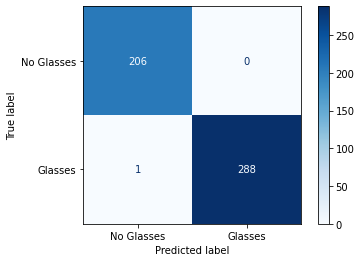

R2:  0.9916854234555044


In [7]:
pred=new_model.predict(x_test)
matrix = confusion_matrix(y_test, pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=['No Glasses', 'Glasses'])

disp.plot(cmap=plt.cm.Blues)
plt.show()
print('R2: ',r2_score(y_test, pred.argmax(axis=1)))